In [32]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import pandas_datareader as dr



In [33]:
df=dr.data.get_data_yahoo('ZEEL.NS',start='2015-10-6',end='2020-10-11')


In [34]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-06,405.000000,397.500000,405.000000,399.000000,1360555.0,386.613281
2015-10-07,401.000000,392.500000,399.100006,399.399994,1217685.0,387.000854
2015-10-08,403.950012,395.299988,400.200012,397.549988,946190.0,385.208313
2015-10-09,403.899994,398.250000,403.899994,401.450012,1368389.0,388.987213
2015-10-12,405.899994,398.350006,403.200012,401.299988,569277.0,388.841858
...,...,...,...,...,...,...
2020-10-06,219.550003,208.449997,211.000000,216.899994,26397296.0,216.899994
2020-10-07,218.500000,203.800003,217.600006,205.949997,33782509.0,205.949997
2020-10-08,212.949997,204.149994,209.899994,205.899994,24845156.0,205.899994


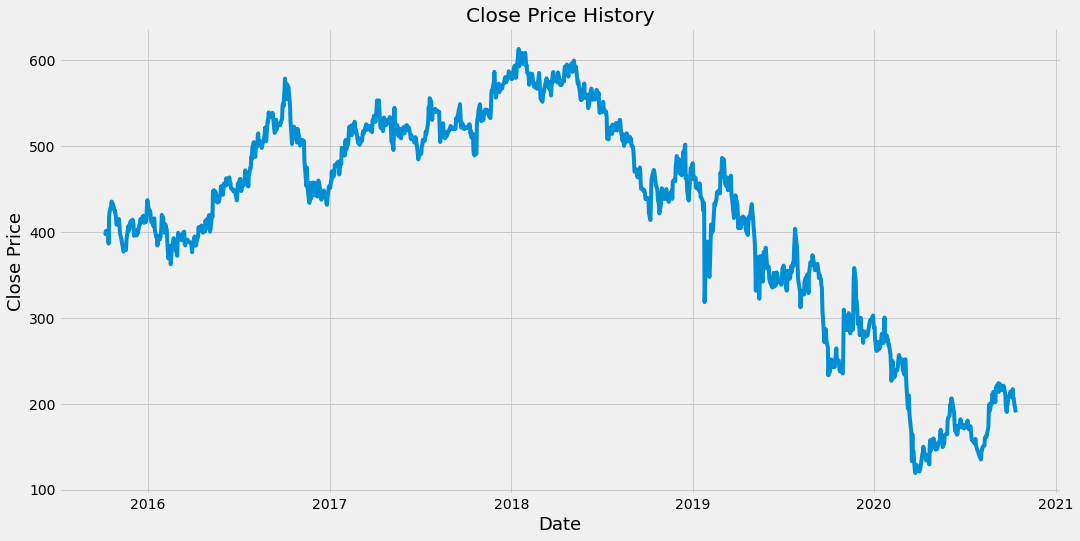

In [35]:
#visuliazing the close price 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [36]:
#new dataframe
data=df.filter(['Close'])
#coverting to numpy
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

988

In [37]:
#scaling the datas
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.5662114 ],
       [0.5670207 ],
       [0.56327764],
       ...,
       [0.17551844],
       [0.16469398],
       [0.14304502]])

In [38]:
#creating the dataset
train_data=scaled_data[0:training_data_len,:]
#split
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.5662114 , 0.5670207 , 0.56327764, 0.57116843, 0.57086489,
       0.57086489, 0.5411229 , 0.60617093, 0.61568032, 0.62964085,
       0.64036414, 0.6372281 , 0.63328271, 0.61871522, 0.61841168,
       0.61031861, 0.59999999, 0.58573592, 0.59433481, 0.59838134,
       0.59888716, 0.58047541, 0.56509863, 0.54982292, 0.54233687,
       0.52240767, 0.52594839, 0.52756698, 0.52594839, 0.55083456,
       0.56074856, 0.58290336, 0.57147191, 0.58644408, 0.59332317,
       0.58472429, 0.59747091, 0.59595346, 0.58765805, 0.55943344,
       0.56843701, 0.56985326, 0.56004046, 0.57268588, 0.56368232,
       0.57986846, 0.58512897, 0.58573592, 0.59868482, 0.59564992,
       0.60313603, 0.59939298, 0.60677789, 0.5899848 , 0.59160338,
       0.60131511, 0.62529084, 0.64360138, 0.63480016, 0.61264542])]
[0.6189174953994793]



In [39]:
#converting to numpy
x_train,y_train=np.array(x_train),np.array(y_train)

In [40]:
#reshaping the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(928, 60, 1)

In [41]:
#LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [42]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [43]:
model.fit(x_train,y_train,batch_size=1,epochs=3)

Epoch 1/3
928/928 [==============================] - 22s 24ms/step - loss: 0.0046
Epoch 2/3
928/928 [==============================] - 21s 23ms/step - loss: 0.0015
Epoch 3/3
928/928 [==============================] - 21s 22ms/step - loss: 0.0012


In [44]:
#creating rhe testing data
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [45]:
#numpy to array
x_test=np.array(x_test)

In [46]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [47]:
#get the models prediction
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [48]:
#RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


16.408980198292657

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


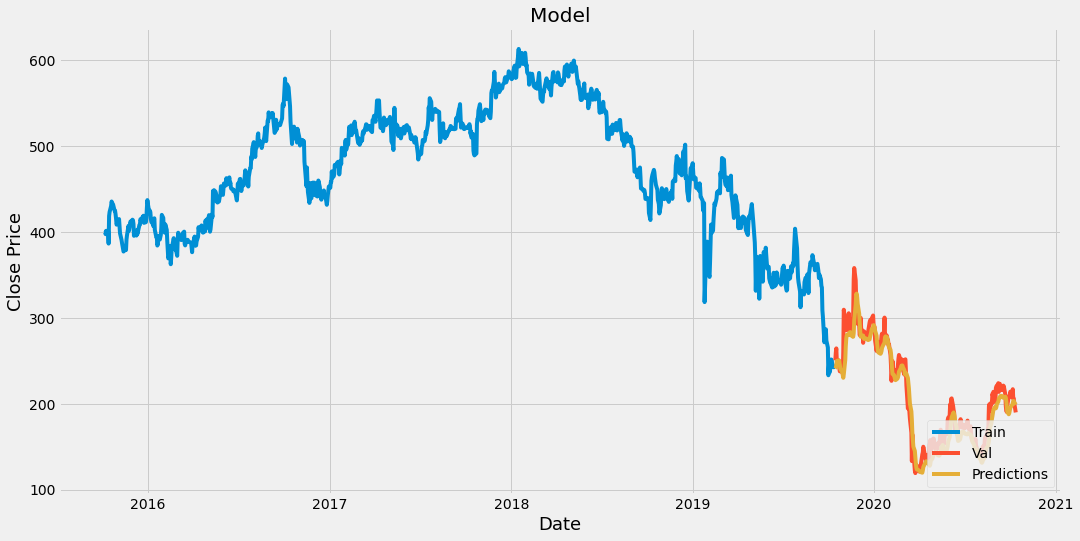

In [49]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [50]:
valid

,Close,Predictions
Date,,
2019-10-15,250.699997,240.934830
2019-10-16,259.649994,241.861465
2019-10-17,264.450012,245.232758
2019-10-18,250.199997,249.828079
2019-10-22,250.449997,250.502701
...,...,...
2020-10-06,216.899994,200.755020
2020-10-07,205.949997,203.203430
2020-10-08,205.899994,202.987885


In [51]:
len(test_data)

307

In [52]:
x_input=test_data[207:].reshape(1,-1)
x_input.shape


(1, 100)

In [53]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [54]:
temp_input

[0.08922609293251979,
 0.09317145835070881,
 0.09165400773812751,
 0.1245321043440559,
 0.13029842902090957,
 0.13505308908343058,
 0.16145673591686774,
 0.15488111659568207,
 0.17491148320532238,
 0.17612542517182037,
 0.1576125400473731,
 0.14820432772580197,
 0.14294385079242047,
 0.11492158379770759,
 0.0999494167692834,
 0.09377844477026373,
 0.09054120444771221,
 0.09276681102854281,
 0.11178551302385056,
 0.10885178134738235,
 0.11714719037853819,
 0.12706118869835806,
 0.11117855747690744,
 0.10763783938088436,
 0.11552857021726246,
 0.1070308529613295,
 0.10510875502658215,
 0.11380878050729229,
 0.11178551302385056,
 0.1074355002834955,
 0.11310065541165473,
 0.1237228096997239,
 0.10723316118610662,
 0.10672734431524619,
 0.10308548754314042,
 0.11047040150865808,
 0.09539706493153946,
 0.08315629048219456,
 0.07738996580534088,
 0.07738996580534088,
 0.07202831932326495,
 0.07000505183982322,
 0.07658067116100889,
 0.08052603657919791,
 0.06585734732424528,
 0.0531107560040

In [55]:
#predicting the next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.15096252]
101
1 day input [0.09317146 0.09165401 0.1245321  0.13029843 0.13505309 0.16145674
 0.15488112 0.17491148 0.17612543 0.15761254 0.14820433 0.14294385
 0.11492158 0.09994942 0.09377844 0.0905412  0.09276681 0.11178551
 0.10885178 0.11714719 0.12706119 0.11117856 0.10763784 0.11552857
 0.10703085 0.10510876 0.11380878 0.11178551 0.1074355  0.11310066
 0.12372281 0.10723316 0.10672734 0.10308549 0.1104704  0.09539706
 0.08315629 0.07738997 0.07738997 0.07202832 0.07000505 0.07658067
 0.08052604 0.06585735 0.05311076 0.05108749 0.04693981 0.04258977
 0.03965604 0.03196762 0.04896308 0.05341426 0.05988871 0.06262014
 0.06484571 0.08214466 0.08517956 0.08730399 0.08507839 0.10308549
 0.11087505 0.15710672 0.16246837 0.1474962  0.16681841 0.16348
 0.18684875 0.18290338 0.19160344 0.17076378 0.16722306 0.20030347
 0.20455234 0.20485582 0.21203842 0.1914011  0.20718259 0.2104198
 0.20020233 0.1963581  0.19888718 0.19564997 0.20627213 0.20465351
 0.18523013 0.15771371 0.14699039 0.1

In [56]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [57]:
import matplotlib.pyplot as plt

In [58]:
day_new,scaler.inverse_transform(scaled_data[1136:])

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]), array([[165.19999695],
        [164.44999695],
        [180.69999695],
        [183.55000305],
        [185.8999939 ],
        [198.94999695],
        [195.69999695],
        [205.6000061 ],
        [206.19999695],
        [197.05000305],
        [192.3999939 ],
        [189.80000305],
        [175.94999695],
        [168.55000305],
        [165.5       ],
        [163.8999939 ],
        [165.        ],
        [174.3999939 ],
   

In [59]:
#Predictions of 13 october to 23 october.
day_pred,scaler.inverse_transform(lst_output)

(array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130]), array([[193.76322884],
        [189.62459735],
        [185.92300635],
        [182.46918529],
        [179.18746719],
        [176.04549806],
        [173.02532963],
        [170.11241254],
        [167.29199859],
        [164.54867673],
        [161.86684809],
        [159.23153983],
        [156.62901643],
        [154.04735042],
        [151.47656973],
        [148.90887125],
        [146.33842198],
        [143.76131853],
        [141.1752299 ],
        [138.5791876 ],
        [135.97330581],
        [133.35849867],
        [130.73621524],
        [128.10827465],
        [125.4766401 ],
        [122.84332497],
        [120.21024782],
        [117.57920292],
        [114.95180273],
        [112.32943737]]))

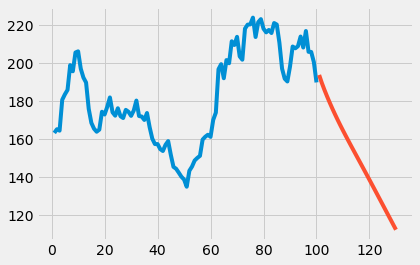

In [60]:
plt.plot(day_new,scaler.inverse_transform(scaled_data[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [61]:
#Create a new dataframe to predict the next day open price 19th oct.
#new_df = df.filter(['Open'])
#Get teh last 60 day closing price 
###last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
#last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
#X_test = []
#Append teh past 60 days
#X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
#X_test = np.array(X_test)
#Reshape the data
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
#pred_price_open = model.predict(X_test)
#undo the scaling 
#pred_price_open = scaler.inverse_transform(pred_price_open)

In [62]:
#getting the Last 60 data to predict the next day ie...8th october with 99% accuracy.
#pred_price_open